# Task 4

First, update the following cell to have a link to your Homework 1 GitHub repository:

UPDATE THIS LINK:

https://github.com/carmengg/eds-220-hwk-1

In this task, make at least 5 commits at moments you think are adequate. We'll look at your repo to check commit history. Err on the side of commenting too much for now to get in the habit.

Add comments for all your code. Err on the side of commenting too much for now.

Comments in each exercise and commits will count towards your grade.

This task covers topics we will see on Wednesday Oct. 11. You might want to wait until after that class to solve it.

## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is in tabular format and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it as `raw_eqk` (variable name).

c. Look at the head of the dataframe.

In [2]:
# a and b. Import the pandas library and read the 'earthquake_data.csv' file as 'raw_eqk'
import pandas as pd
raw_eqk = pd.read_csv('data/earthquake_data.csv')

# b. Display the first few rows of the 'raw_eqk' variable
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


## 2
a. Print the shape of the `raw_eqk` dataframe.

b. Print the type of `raw_eqk`'s shape.

c. Print *only* the number of rows by accessing it from `raw_eqk`'s shape. HINT: how do you index an element in a tuple?

In [26]:
# a. Print the shape of raw_eqk: 120,108 rows and 8 columns
print(raw_eqk.shape)

(120108, 8)


In [27]:
# b. Print type of raw_eqk, which is tuple
type(raw_eqk.shape)

tuple

In [28]:
# c. Print number of rows: 120108 rows
print(raw_eqk.shape[0])  

120108


## 3

Get the unique values of the type of events.

In [17]:
# Find the unique value in type of event columns
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

# 4

a. Select only earthquake events and store them as `eqk` (variable name)

b. Update the index of `eqk` to be the `id` column of the dataframe. 

c. Check the new index by viewing the first 3 rows of `eqk`.

In [29]:
# a. Select earthquake events and set the variable 'eqk'
eqk = raw_eqk[raw_eqk['type'] == 'earthquake']

# b. Update the index to the 'id' column
eqk = eqk.set_index('id')

# c. Display the first 3 rows using the updated index
eqk.head(3)

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,"12km NNW of North Nenana, Alaska",earthquake


# 5

How many events were left out of `raw_eqk` when you selected ony earthqake events? 

HINT: There are *many* ways you can get this information. One could be to use (2).

In [30]:
# Count the number of earthquake events
earthquake_count = len(raw_eqk[raw_eqk['type'] == 'earthquake'])

# Count the remaining non-earthquake events
events_left_out = len(raw_eqk) - earthquake_count

print("Number of events left out:", events_left_out)


Number of events left out: 1710


# 6
Without creating any new variables, plot a histogram of the eartquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

<AxesSubplot:title={'center':'Earthquake magnitudes'}, ylabel='Frequency'>

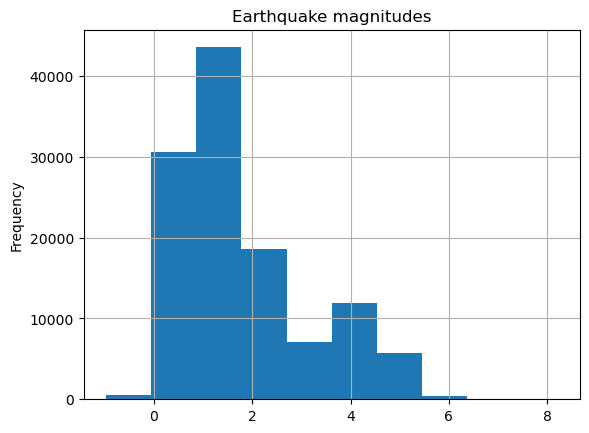

In [20]:
# plot a histrogram of the earthquake's magnitudes
eqk.mag.plot(kind='hist',
             title='Earthquake magnitudes',
             xlabel= 'magnitude',
             grid=True)

# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

<AxesSubplot:title={'center':'top 20 earthquake magnitude'}, xlabel='id', ylabel='magnitude'>

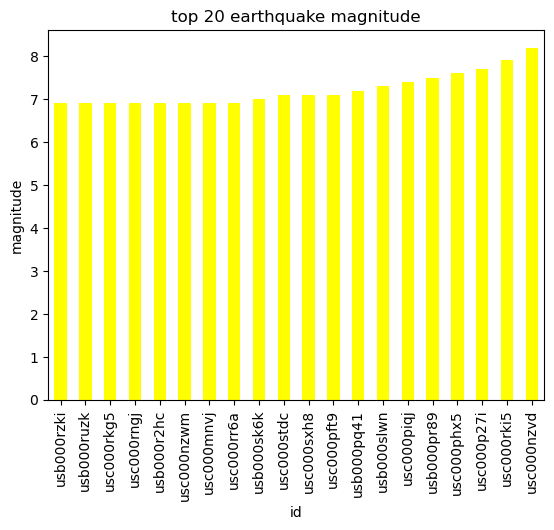

In [24]:
# Set 'top20' with the 20 earthquakes with the largest magnitude and sort them
top20 = eqk['mag'].nlargest(20)

# Plot a bar graph of the 'top20' variable
top20.plot(kind='bar', # set the bar graph
           title='Top 20 Earthquake Magnitudes', 
           xlabel='ID', # x-axis is 'id' column
           ylabel='Magnitude', # y-axis is 'mag' column
           color='yellow')


*Write your answer for 7c here*

If you had not updated the index when creating the top20 variable, the default index would be assigned to the DataFrame, which would be a range of integers starting from 0. In this case, the index wouldn't provide any meaningful information about the earthquakes.

# 8 
We are interested in place, magnitude and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame.

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [13]:
# Select 'place,' 'mag,' and 'depth' for the top 20 largest magnitude earthquakes
top20_data = eqk.loc[top20.index, ['place', 'mag', 'depth']]
top20_data

,place,mag,depth
id,,,
usc000nzvd,"94km NW of Iquique, Chile",8.2,25.00
usc000rki5,"19km SE of Little Sitkin Island, Alaska",7.9,109.00
usc000p27i,"53km SW of Iquique, Chile",7.7,22.40
usc000phx5,"93km SSE of Kirakira, Solomon Islands",7.6,22.56
usb000pr89,"70km SW of Panguna, Papua New Guinea",7.5,43.37
usc000piqj,"112km S of Kirakira, Solomon Islands",7.4,39.00
usb000slwn,"74km S of Intipuca, El Salvador",7.3,40.00
usb000pq41,"33km ESE of Petatlan, Mexico",7.2,24.00
usc000pft9,"56km WSW of Panguna, Papua New Guinea",7.1,60.53


# 9 

Without creating any new variables, visualize the locations of eartquakes with magnitude greter than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


<AxesSubplot:title={'center':'location of earthquakes with magnitude greater than 5'}, xlabel='latitude', ylabel='longitude'>

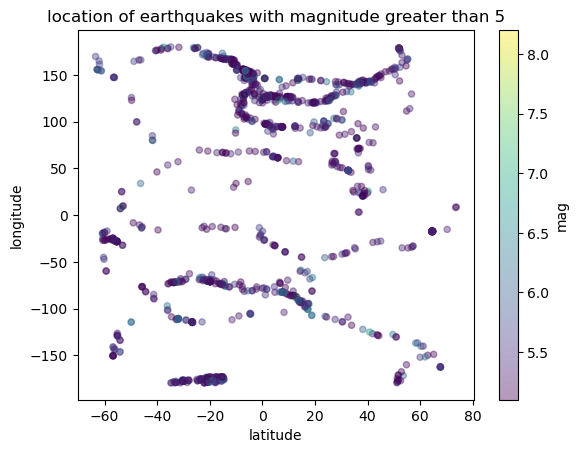

In [17]:
# Scatter plot of earthquakes with magnitude greater than 5, showing location and magnitude
raw_eqk[raw_eqk['mag'] > 5].plot.scatter(
    title='Location of Earthquakes greather than Magnitude 5',
    x='latitude', # x-axis
    y='longitude', # y-axis
    c='mag', # point by magnitude
    colormap='viridis', #color map is 'viridis'
    alpha=0.4
)

